# Gradient Descent

### 라이브러리 import 및 설정

In [1]:
import csv
import random
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

### csv 파일에서 필요한 값들 가져오기

In [2]:
x2 = []
x3 = []
y = []

f = open('hw1_data.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)

i = 0
for line in rdr:
    i = i+1
    if i == 1:
        continue
    x2.append(float(line[2]))
    x3.append(float(line[3]))
    y.append(float(line[7]))
f.close()

### 데이터 분포 확인

In [3]:
m = len(list(y))

print("max(x2):", max(x2), "min(x2):", min(x2))
print("max(x3):", max(x3), "min(x3):", min(x3))
print("max(y):", max(y), "min(y):", min(y))

max(x2): 43.8 min(x2): 0.0
max(x3): 6488.021 min(x3): 23.38284
max(y): 117.5 min(y): 7.6


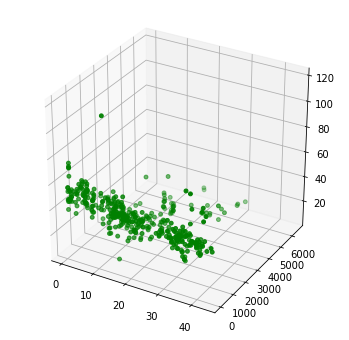

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2,x3,y, c='g', marker='o', s=15, cmap='Greens')

### 세타, 알파 초기값 지정

In [22]:
theta0 = random.randint(1,100)
theta2 = random.random()
theta3 = random.random()
alpha = 0.0000001

print("theta0:", theta0)
print("theta2:", theta2)
print("theta3:", theta3)

theta0: 47
theta2: 0.7130249181904895
theta3: 0.9786767152223484


### 경사하강법에 사용되는 함수들

In [23]:
def h(a,b,c,x2,x3):
    return a*x2 + b*x3 + c

def sum(a,b,c,x2,x3,y):
    s = 0
    for i,j,k in zip(x2,x3,y):
        s = s + ((h(a,b,c,i,j) - k) ** 2)
    return s

def sum_theta0(a,b,c,x2,x3,y):
    s = 0
    for i,j,k in zip(x2,x3,y):
        s = s + (h(a,b,c,i,j) - k)
    return s

def sum_theta2(a,b,c,x2,x3,y):
    s = 0
    for i,j,k in zip(x2,x3,y):
        s = s + ((h(a,b,c,i,j) - k) * i)
    return s

def sum_theta3(a,b,c,x2,x3,y):
    s = 0
    for i,j,k in zip(x2,x3,y):
        s = s + ((h(a,b,c,i,j) - k) * j)
    return s

def j(x2,x3,y):
    return (1 / (2*m)) * sum(theta2,theta3,theta0,x2,x3,y)

### Cost Function 최소화

In [24]:
iteration = 0

while 1:
    iteration = iteration + 1
    
    print("#",iteration," theta2: ",theta2,"theta3: ",theta3, "theta0: ",theta0)
    print("       j(x2,x3,y): ",j(x2,x3,y),"\n")
    
    origin = j(x2,x3,y)
    
    updated_theta0 = theta0 - alpha * (1/m) * sum_theta0(theta2,theta3,theta0,x2,x3,y)
    updated_theta2 = theta2 - alpha * (1/m) * sum_theta2(theta2,theta3,theta0,x2,x3,y)
    updated_theta3 = theta3 - alpha * (1/m) * sum_theta3(theta2,theta3,theta0,x2,x3,y)
    
    theta0 = updated_theta0
    theta2 = updated_theta2
    theta3 = updated_theta3
    
    if origin < j(x2,x3,y):
        print("Set the alpha again.")
        break
    
    if iteration > 10000:
        break

# 1  theta2:  0.7130249181904895 theta3:  0.9786767152223484 theta0:  47
       j(x2,x3,y):  1358532.0656098097 

# 2  theta2:  0.7110592137105032 theta3:  0.7046553644383186 theta0:  46.999891757701064
       j(x2,x3,y):  711393.6152402868 

# 3  theta2:  0.7096297442280699 theta3:  0.5063741169853675 theta0:  46.999813219676774
       j(x2,x3,y):  372555.7723511248 

# 4  theta2:  0.7085882935264736 theta3:  0.36289825581126123 theta0:  46.999756175612944
       j(x2,x3,y):  195142.292012525 

# 5  theta2:  0.7078276126497002 theta3:  0.25907946180554403 theta0:  46.99971468454276
       j(x2,x3,y):  102249.64683492646 

# 6  theta2:  0.7072700964690992 theta3:  0.18395644175848883 theta0:  46.99968444759459
       j(x2,x3,y):  53611.607736940816 

# 7  theta2:  0.7068595900698176 theta3:  0.12959762597226188 theta0:  46.999662354113575
       j(x2,x3,y):  28145.016904212047 

# 8  theta2:  0.7065554598685194 theta3:  0.09026374658239539 theta0:  46.999646153236135
       j(x2,x3,y):

In [25]:
print("theta0:", theta0, " theta2:",theta2, " theta3:",theta3)

theta0: 46.99303121666305  theta2: 0.48488431729978865  theta3: -0.01114279433870516
